In [2]:
%ls utils

 El volumen de la unidad X es Crucial NVME
 El n�mero de serie del volumen es: A4DF-210D

 Directorio de x:\Life\TFG\Coding\Project_v2\ObjectDetector\utils

29/05/2024  20:56    <DIR>          .
04/06/2024  17:16    <DIR>          ..
31/05/2024  19:13    <DIR>          __pycache__
04/06/2024  16:01            29.815 visualization.py
28/05/2024  10:23             2.355 wrappers.py
               2 archivos         32.170 bytes
               3 dirs  450.732.765.184 bytes libres


In [13]:
from utils import visualization as vis
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [9]:
csvfile = "X:\Life\TFG\Coding\/Project_v2/data/VID_20220426_161600/objects_detections_unprocessed.csv"

videofile = "X:\Life\TFG\Coding\Testing\Videos\BikeBi\VID_20220426_161600.mp4"

In [10]:
# Read CSV file
df = pd.read_csv(csvfile)

# Obtain the unique IDs
tracker_ID_df = vis.unique_ID_dict(df)

#df = assign_class_to_tracker(df)

# Maintain only the track IDs that appear at least
appearances = 3
result_ids = vis.get_ids_by_appearances(tracker_ID_df, appearances)
filter_data = vis.filter_data_by_ids(df, result_ids)

# Combine persons with bikes and motorcycles
combined_df = vis.update_dataframe_improved(filter_data)

In [74]:
combined_df.head(n=55)

,x_min,y_min,x_max,y_max,class_id,class_name,confidence,tracker_id,Frame
0,964.46045,456.05430,1037.26980,651.37330,0,person,0.802790,1,0
1,452.87420,502.45486,482.69733,596.35940,0,person,0.700830,2,0
2,513.70630,507.80780,542.49414,592.04834,0,person,0.700100,3,0
3,591.27954,504.81766,617.40247,583.35410,0,person,0.651316,4,0
4,940.38690,447.17004,1010.64185,645.83563,0,person,0.814547,1,1
5,425.75204,486.05707,450.78598,584.64980,0,person,0.510456,2,1
6,488.86070,491.17220,516.24084,576.38873,0,person,0.641854,3,1
7,566.57950,495.97876,594.43756,566.10016,0,person,0.362733,4,1
8,909.15940,449.30853,994.58370,646.07153,0,person,0.787852,1,2
9,400.54367,485.17636,431.41870,581.86740,0,person,0.512015,2,2


In [14]:
# Obtain a dictionary of groups of id
grouped_list = vis.group_riders_trackers_id(combined_df)
print(grouped_list)
updated_detections = vis.propagate_detection(combined_df)
updated_detections = vis.combine_detections(updated_detections)

frame_iterator = iter(vis.display_bounding_boxes_new(updated_detections, videofile))

{192: {192, 227}}


590
(1920, 1080, 3)


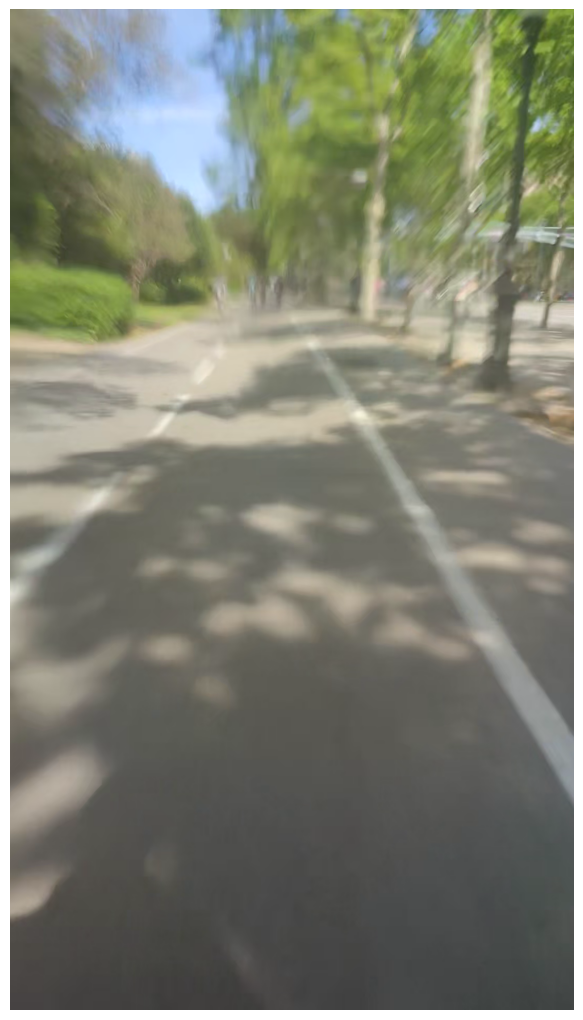

In [607]:
# Visualize it
frame_with_bboxes, frame_number = next(frame_iterator)
print(frame_number)
print(frame_with_bboxes.shape)
plt.figure(figsize=(24,13))
plt.imshow(cv2.cvtColor(frame_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def apply_rolling_average_to_detph(csv_path, frame_distance):
    # Load the CSV into a DataFrame
    df = pd.read_csv(csv_path)

    # Sort the DataFrame by tracker_id and Frame
    df.sort_values(by=['tracker_id', 'Frame'], inplace=True)
    
    # Define a custom rolling average function
    def custom_rolling_avg(group, frame_distance):
        depths = group['depth'].copy()
        frames = group['Frame']
        
        # Create a new column for the rolling average depth
        rolling_avg_depth = depths.copy()
        
        for i in range(len(depths)):
            # If the depth is not NaN, assign it directly to the rolling average column
            if not pd.isna(depths.iloc[i]):
                rolling_avg_depth.iloc[i] = depths.iloc[i]
            else:
                # Get the frame number of the current detection
                current_frame = frames.iloc[i]
                
                # Determine the window of frames within the frame distance
                window_mask = (frames >= current_frame - frame_distance) & (frames <= current_frame + frame_distance)
                
                # Calculate the rolling average for the depths within this window, ignoring NaNs
                rolling_avg_depth.iloc[i] = depths[window_mask].mean()
        
        return rolling_avg_depth
    
    # Apply the custom rolling average function to each group of tracker_id
    df['depth'] = df.groupby('tracker_id').apply(lambda group: custom_rolling_avg(group, frame_distance)).reset_index(level=0, drop=True)
    df.sort_values(by=['Frame'], inplace=True)
    return df

def apply_rolling_average_to_detph_average(csv_path, frame_distance):
    # Load the CSV into a DataFrame
    df = pd.read_csv(csv_path)

    # Sort the DataFrame by tracker_id and Frame
    df.sort_values(by=['tracker_id', 'Frame'], inplace=True)
    
    # Define a custom rolling average function
    def custom_rolling_avg(group, frame_distance):
        depths = group['depth_rolling_avg'].copy()
        frames = group['Frame']
        
        # Create a new column for the rolling average depth
        rolling_avg_depth = depths.copy()
        
        for i in range(len(depths)):
            # If the depth is not NaN, assign it directly to the rolling average column
            if not pd.isna(depths.iloc[i]):
                rolling_avg_depth.iloc[i] = depths.iloc[i]
            else:
                # Get the frame number of the current detection
                current_frame = frames.iloc[i]
                
                # Determine the window of frames within the frame distance
                window_mask = (frames >= current_frame - frame_distance) & (frames <= current_frame + frame_distance)
                
                # Calculate the rolling average for the depths within this window, ignoring NaNs
                rolling_avg_depth.iloc[i] = depths[window_mask].mean()
        
        return rolling_avg_depth
    
    # Apply the custom rolling average function to each group of tracker_id
    df['depth'] = df.groupby('tracker_id').apply(lambda group: custom_rolling_avg(group, frame_distance)).reset_index(level=0, drop=True)
    df.sort_values(by=['Frame'], inplace=True)
    return df

In [59]:
frame_distance =15
csv_path="X:\Life\TFG\Coding\Project_v2\data\VID_20220426_161600\objects_detections_depth.csv"
result_df = pd.read_csv(csv_path)
#result_df = apply_rolling_average_to_detph(csv_path, frame_distance)
#result_df = apply_rolling_average_to_detph_average(csv_path, 7)
# result_df = apply_rolling_average_to_detph_average(csv_path, 3)
# Save the result to a new CSV file
#result_df.to_csv(csv_path, index=False)

In [41]:
result_df.head(n=200)

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,Frame,class_name,depth,depth_rolling_avg
0,964.110900,454.03424,1038.78880,649.59200,0,0.772512,1,0,person,7.143702,7.143702
1,590.486000,508.73900,616.63086,581.14703,0,0.538745,4,0,person,16.276283,16.276283
2,454.416600,508.97983,482.57968,596.49805,0,0.631614,2,0,person,15.835846,15.835846
3,514.102200,509.53210,540.20090,588.09260,0,0.611843,3,0,person,16.174183,16.174183
4,488.443500,492.52036,515.54376,575.54110,0,0.615447,3,1,person,15.055665,15.055665
...,...,...,...,...,...,...,...,...,...,...,...
195,4.093838,1398.67680,483.25922,1913.98800,0,0.626819,40,141,person,0.999911,0.999911
196,2.843160,1400.80690,461.52260,1911.23600,0,0.380385,40,142,person,0.981082,0.981082
197,989.501300,565.06740,1079.85850,640.48770,2,0.437441,53,142,car,11.078207,11.078207
198,610.795700,521.84040,638.92035,588.58480,0,0.486144,55,143,person,18.075374,18.075374


In [63]:
def plot_depth(df, tracker_id):
    # Filter the DataFrame for the specified tracker_id
    tracker_df = df[df['tracker_id'] == tracker_id]
    
    if tracker_df.empty:
        print(f"No data found for tracker_id {tracker_id}")
        return
    
    # Plot the depth_rolling_avg across frames
    plt.figure(figsize=(10, 6))
    plt.scatter(tracker_df['Frame'], tracker_df['depth'], marker='o', linestyle='-', color='b')
    plt.xlabel('Frame')
    plt.ylabel('Depth Rolling Average')
    plt.title(f'Depth Rolling Average for Tracker ID {tracker_id}')
    plt.grid(True)
    plt.show()

def plot_estimated_depth(df, tracker_id):
    # Filter the DataFrame for the specified tracker_id
    tracker_df = df[df['tracker_id'] == tracker_id]
    
    if tracker_df.empty:
        print(f"No data found for tracker_id {tracker_id}")
        return
    
    # Plot the depth_rolling_avg across frames
    plt.figure(figsize=(10, 6))
    plt.scatter(tracker_df['Frame'], tracker_df['estimated_depth'], marker='o', linestyle='-', color='b')
    plt.xlabel('Frame')
    plt.ylabel('Estimated Depth [m]')
    plt.title(f'Estimated Depth for Tracker ID {tracker_id}')
    plt.grid(True)
    plt.show()

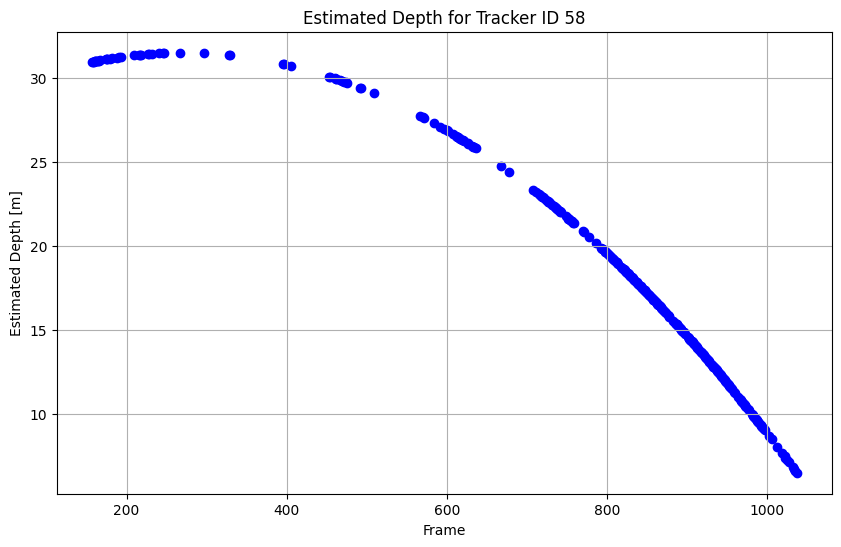

In [64]:
tracker_id_to_plot = 58
plot_estimated_depth(result_df, tracker_id_to_plot)

In [57]:
def plot_corrected_depth(df, tracker_id):
    # Filter the DataFrame for the specified tracker_id
    tracker_df = df[df['tracker_id'] == tracker_id]
    
    if tracker_df.empty:
        print(f"No data found for tracker_id {tracker_id}")
        return
    
    # Get the Frame and depth_rolling_avg columns
    frames = tracker_df['Frame'].values
    depths = tracker_df['depth'].values
    
    # Remove NaN values
    valid_mask = ~np.isnan(depths)
    frames = frames[valid_mask]
    depths = depths[valid_mask]
    
    # Fit a second-order polynomial to the data
    p = np.polyfit(frames, depths, 2)
    poly_fit = np.poly1d(p)
    
    # Generate fitted values
    fitted_depths = poly_fit(frames)
    
    # Plot the original rolling average depth and the fitted depth
    plt.figure(figsize=(10, 6))
    plt.scatter(frames, depths, marker='o', linestyle='-', color='b', label='Rolling Avg Depth')
    plt.plot(frames, fitted_depths, linestyle='--', color='r', label='Fitted Depth (2nd Order)')
    plt.xlabel('Frame')
    plt.ylabel('Depth')
    plt.title(f'Depth Estimation for Tracker ID {tracker_id}')
    plt.grid(True)
    plt.legend()
    plt.show()

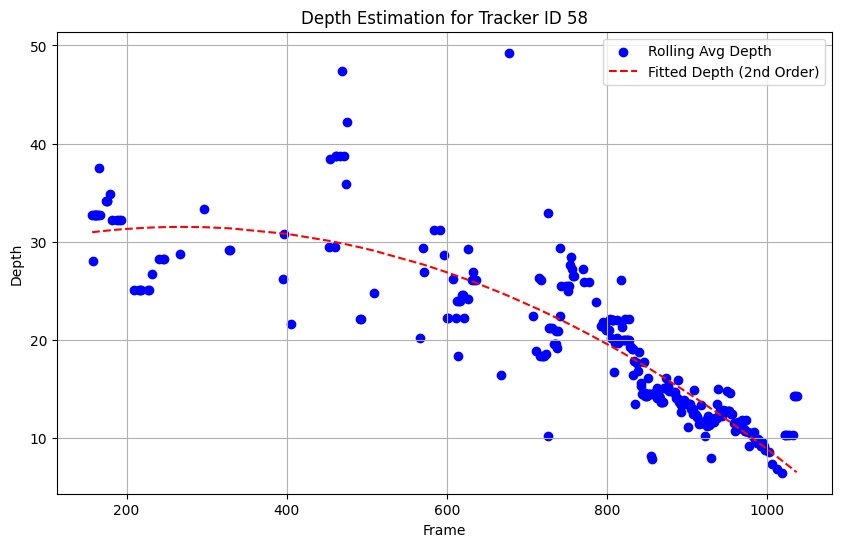

In [58]:
tracker_id_to_plot = 58
plot_corrected_depth(result_df, tracker_id_to_plot)

In [44]:
def get_frames_with_nan_depth_avg(result_df):
    # Filter the DataFrame for rows where depth_rolling_avg is NaN
    rows_without_depth_avg = result_df[result_df['depth'].isna()]

    # Obtain the list of unique frames from the filtered DataFrame
    unique_frames_with_nan = rows_without_depth_avg['Frame'].unique().tolist()

    return unique_frames_with_nan

In [50]:
frames_with_nan = get_frames_with_nan_depth_avg(result_df)

In [51]:
len(frames_with_nan)

33

In [21]:
rows_without_depth_avg = result_df[result_df['depth_rolling_avg'].isna()]

In [22]:
rows_without_depth_avg.shape

(42, 11)

In [23]:
rows_without_depth_avg.head()

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,Frame,class_name,depth,depth_rolling_avg
190,2.109596,1447.4386,478.72272,1917.44080,0,0.659793,40,104,person,NaN,NaN
259,465.995120,540.0143,483.13370,588.81190,0,0.548999,18,210,person,NaN,NaN
366,604.988900,518.6123,624.16660,560.72980,0,0.462731,58,297,person,NaN,NaN
385,3.329701,1440.2985,518.36975,1915.98740,0,0.762422,40,388,person,NaN,NaN
386,998.187440,516.2050,1035.31050,619.38654,0,0.732556,125,392,person,NaN,NaN
